In [50]:
#choose dataset +
#choose purpose of analysis  +
#create v/env + 
#import libraries + 
#import dataset to sql, from sql

In [51]:
#import libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
#connect to DB to import data from table
# con = sqlite3.connect("titanic.db")
# cur = con.cursor()
# tit_df = pd.read_sql('''
#     SELECT PassengerId,Survived,PClass,Name,Sex,Age,Fare,Embarked            
#     FROM titan_person''', con)
# tit_df.head()

In [53]:
titanic_df = pd.read_csv(r'C:\Users\Alex\data_analysis\full_cycle_project\titanic_full_cycle_project\Titanic.csv')

In [54]:
titanic_df.shape

(891, 10)

In [55]:
titanic_df.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone', 'survived'],
      dtype='object')

In [56]:
titanic_df.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [57]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [58]:
#qestions for vizualization
# -- how many pass of each class was on the ship
# -- what is max/min/av age of pass
# -- what is max/min/av age of pass for each class
# -- how many male/female wa on ship
# -- how many male/female of each class was on the ship
# -- what percent of surv from male / female
# -- what precent of surv from each class
# -- how many pass of each emb place was on the ship

In [59]:
# -- how many pass of each class was on the ship

# -- how many pass of each class was on the ship

In [60]:
titanic_df['class'].value_counts().sort_index()

class
First     216
Second    184
Third     491
Name: count, dtype: int64

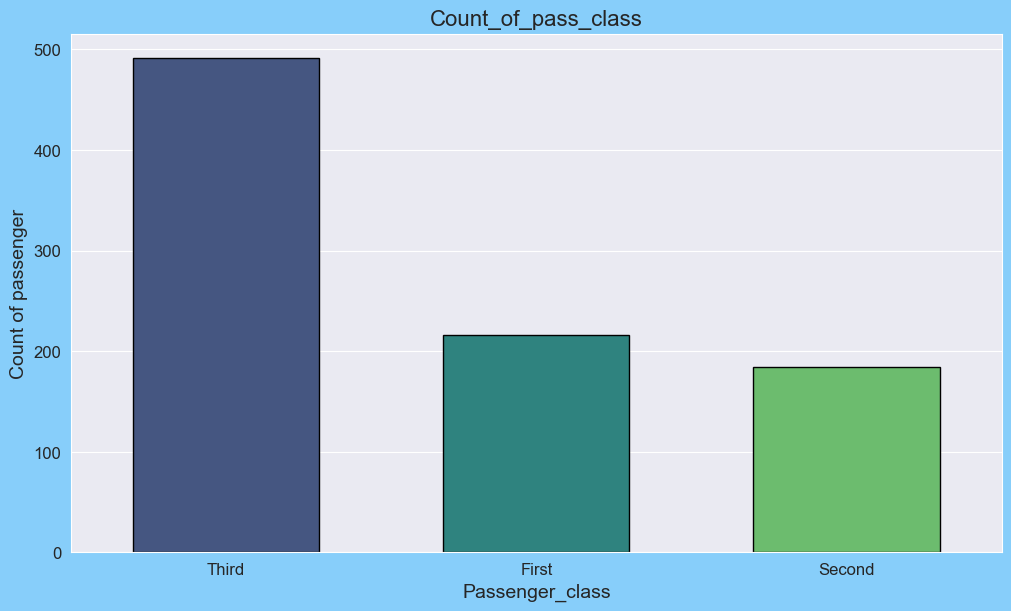

In [61]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='lightskyblue',layout='constrained')
ax = sns.countplot(titanic_df,x='class',palette = 'viridis',width=0.6,edgecolor = 'black')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Count_of_pass_class', loc='center', fontsize='medium', size=16)
plt.xticks(size=12)
plt.xlabel('Passenger_class', size=14)
plt.yticks(size=12)
plt.ylabel('Count of passenger', size=14)
plt.show()


# -- what is max/min/av age of pass

In [62]:
titanic_df['age'].min()

0.42

In [63]:
titanic_df['age'].max()

80.0

In [64]:
titanic_df['age'].mean()

29.69911764705882

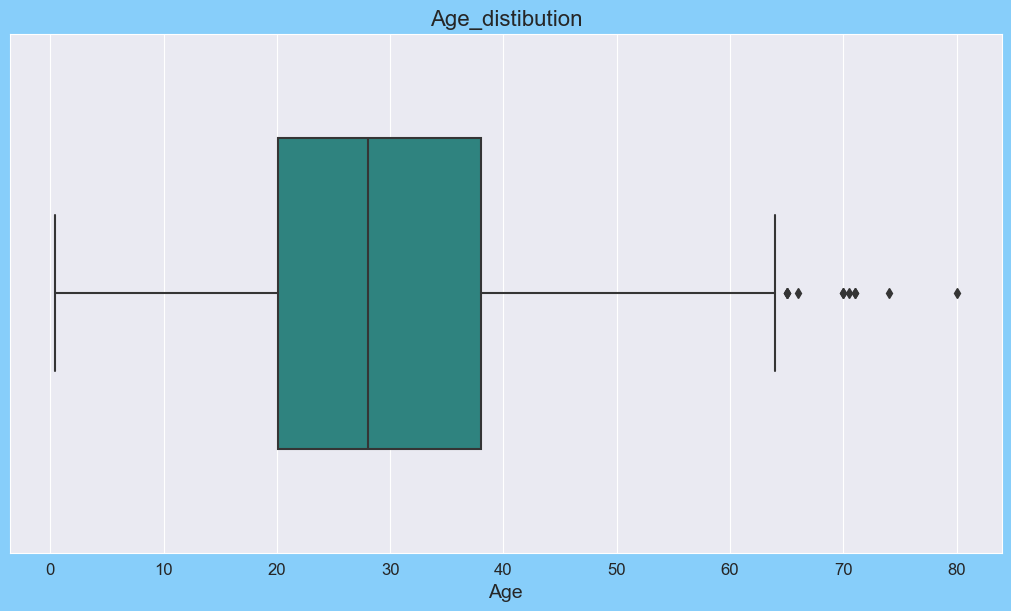

In [65]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='lightskyblue',layout='constrained')
ax = sns.boxplot(titanic_df,x='age',palette = 'viridis',width=0.6)
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Age_distibution', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Age', size=14)
plt.yticks(size=12)
plt.show()

a:\anaconda3\envs\electro_car\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


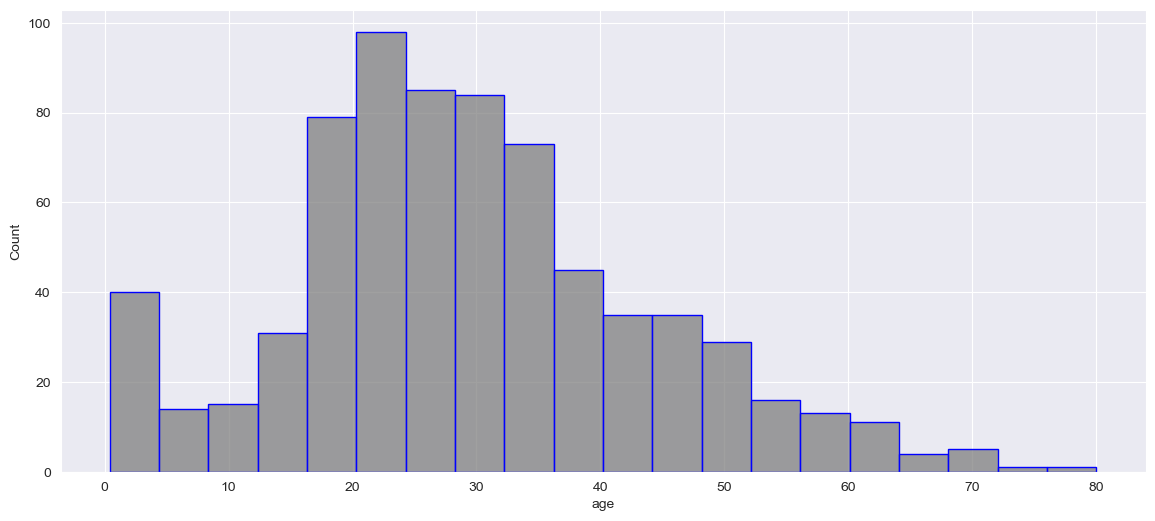

In [66]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(titanic_df['age'],color = 'grey',edgecolor= 'blue')
plt.show()

# -- what is max/min/av age of pass for each class

In [67]:
titanic_df.groupby(by='class')['age'].min()

class
First     0.92
Second    0.67
Third     0.42
Name: age, dtype: float64

In [68]:
titanic_df.groupby(by='class')['age'].max()

class
First     80.0
Second    70.0
Third     74.0
Name: age, dtype: float64

In [69]:
titanic_df.groupby(by='class')['age'].mean()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

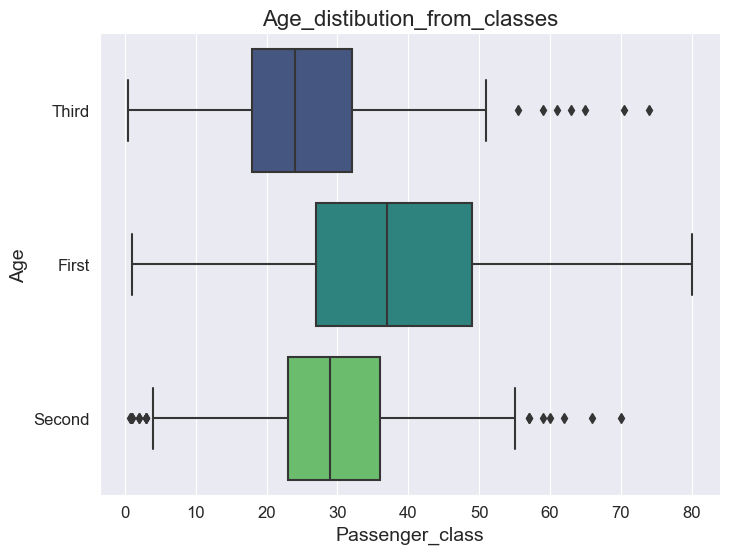

In [70]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(titanic_df,x='age',y='class',palette = 'viridis')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Age_distibution_from_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.ylabel('Age', size=14)
plt.xlabel('Passenger_class', size=14)
plt.yticks(size=12)
plt.show()

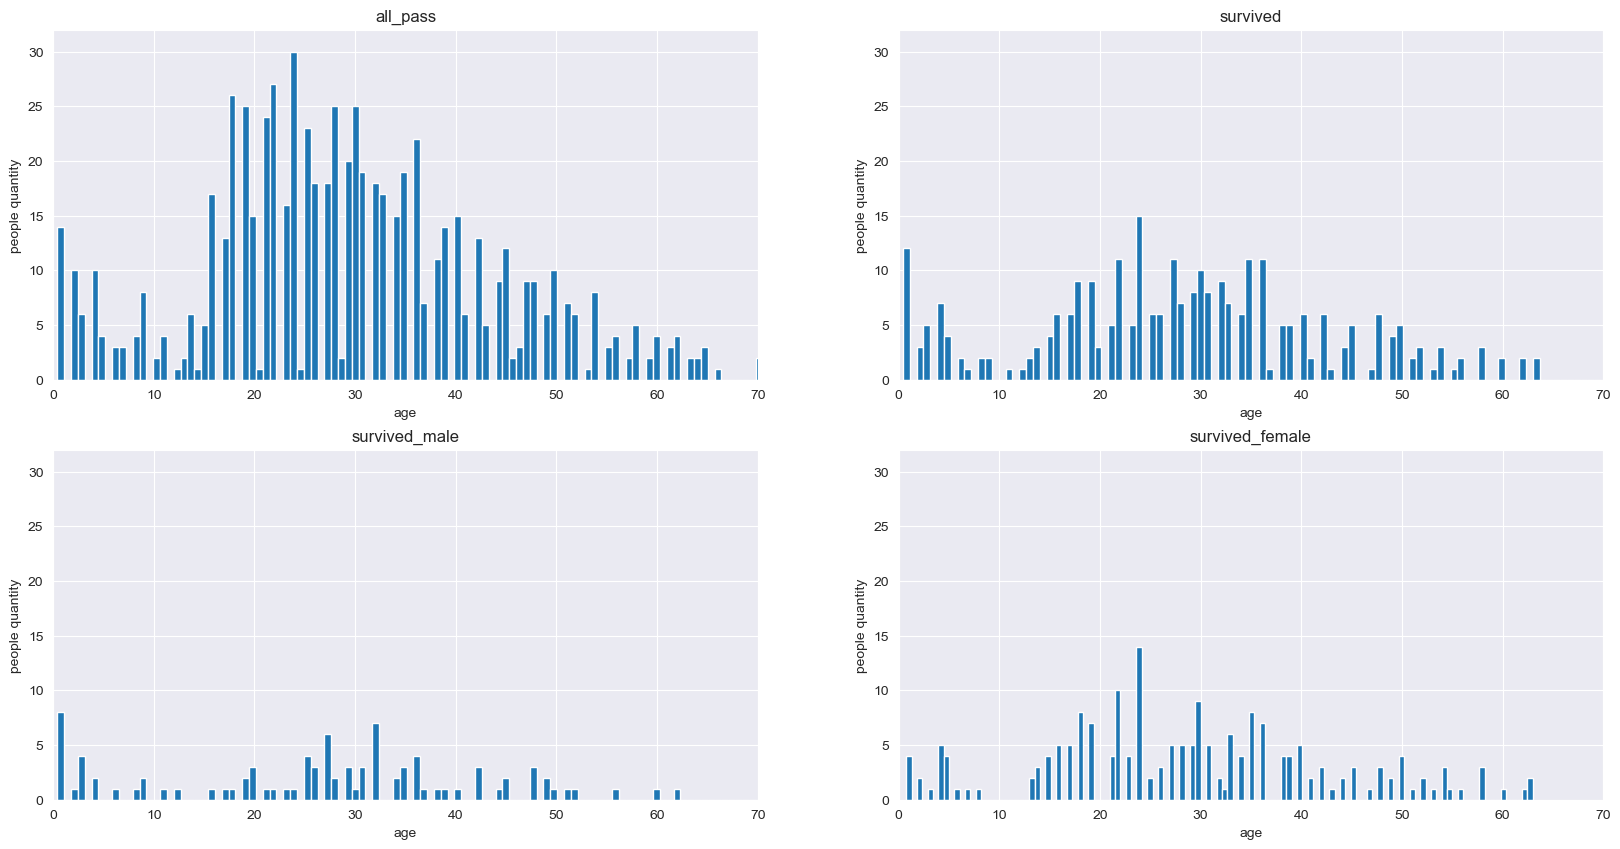

In [71]:
from collections import Counter

#diff group of pass
survivors = titanic_df.loc[(titanic_df['survived'] == 1)]
male_survivors = titanic_df.loc[((titanic_df['sex'] == 'male') & (titanic_df['survived'] == 1))]
female_survivors = titanic_df.loc[((titanic_df['sex'] == 'female') & (titanic_df['survived'] == 1))]

#age quantity
num_of_ages = len(dict(Counter(survivors['age'])).keys())

#vizualize
fig, axs = plt.subplots(2,2,figsize=(20, 10))
# fig.set_figwidth(20)
# fig.set_figheight(10)
names = [['all_pass', 'survived'], ['survived_male', 'survived_female']]
for i, surv in enumerate([[titanic_df, survivors], [male_survivors, female_survivors]]):
    for j, subsurv in enumerate(surv):
        axs[i][j].hist(subsurv['age'], bins=num_of_ages)
        axs[i][j].set_title(names[i][j])
        axs[i][j].set_xlabel('age')
        axs[i][j].set_ylabel('people quantity')
        axs[i][j].set_ylim(0,32)
        axs[i][j].set_xlim(0,70)
plt.show()

# -- survived children distibution

In [72]:
children = titanic_df.loc[((titanic_df['age'] < np.float64(18.0)) & (titanic_df['age'] > 0))]
survivors_children = titanic_df.loc[((titanic_df['age'] < np.float64(18.0)) & (titanic_df['survived'] == 1) & (titanic_df['age'] > 0))]
print(f'pass before 18 age survived {round(len(survivors_children)*100/len(children), 2)}%')

pass before 18 age survived 53.98%


<Axes: >

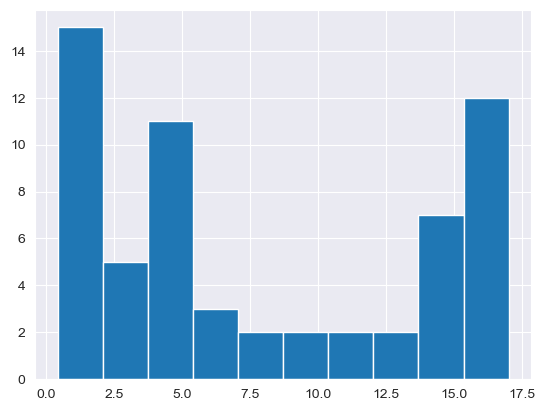

In [73]:
titanic_df.loc[((titanic_df['survived'] == 1) & (titanic_df['age'] > 0) & (titanic_df['age'] < 18))].age.hist()

In [83]:
titan_df = pd.read_csv(r'C:\Users\Alex\data_analysis\full_cycle_project\titanic_full_cycle_project\titanic_kaggle\train.csv')
titan_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
titan_df.columns = map(str.lower, titan_df.columns)
titan_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# -- name analysis

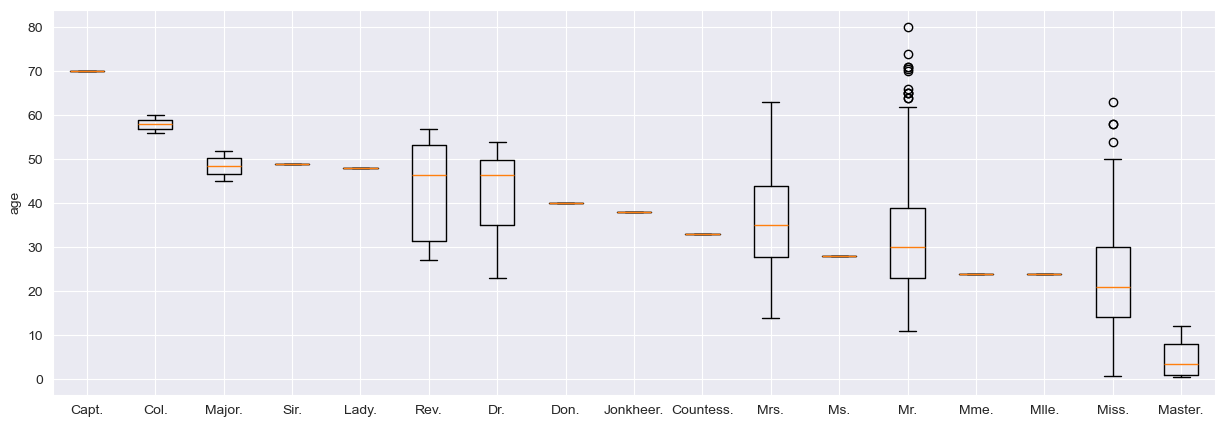

In [89]:
#list of Title
titles = ("Capt.","Col.","Major.","Sir.","Lady.","Rev.","Dr.","Don.","Jonkheer.","Countess.","Mrs.","Ms.","Mr.","Mme.","Mlle.","Miss.","Master.")

#create list of Title for each pass
titled_names = []
for name in titan_df.name:
    for title in titles:
        if title in name.split(' '):
            titled_names.append(title)
            break


#add new column Title
titan_df.insert(10, 'Title', titled_names)

#create dict title:list of ages
ages = dict.fromkeys(titles, [])
for i, title in enumerate(titan_df.Title):
    if not pd.isna(titan_df.age[i]):
        ages[title] = ages[title] + [titanic_df.age[i]]

#vizualize
fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(ages.values(), labels=titles, vert=True)
ax.set_ylabel('age')
plt.show()

Text(0, 0.5, 'survived_quantity')

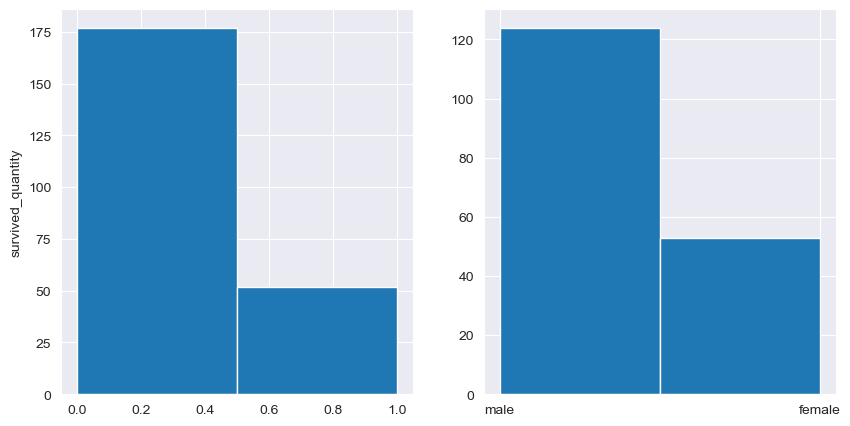

In [91]:
noage = titan_df.loc[(pd.isna(titan_df['age']))]
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].hist(noage.survived, bins=2, cumulative=-1)
ax[1].hist(noage.sex, bins=2)
ax[0].set_ylabel('survived_quantity')

In [92]:
#let's restore age
for i, age in enumerate(titan_df.age):
    if pd.isna(age):
        titan_df.age[i] = np.median(ages[titan_df.Title[i]])

C:\Users\Alex\AppData\Local\Temp\ipykernel_5372\716067747.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titan_df.age[i] = np.median(ages[titan_df.Title[i]])
C:\Users\Alex\AppData\Local\Temp\ipykernel_5372\716067747.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titan_df.age[i] = np.median(ages[titan_df.Title[i]])
C:\Users\Alex\AppData\Local\Temp\ipykernel_5372\716067747.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tit

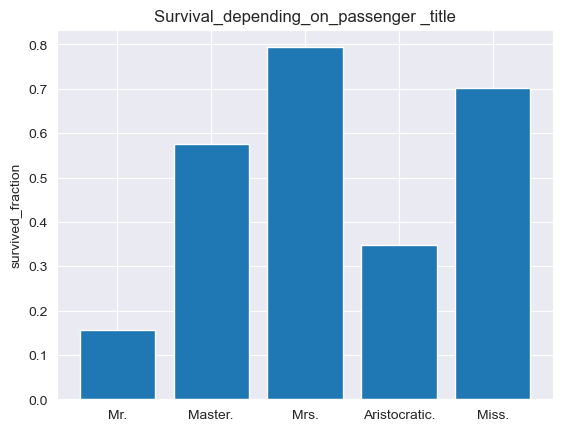

In [96]:
# groups for join
aristocratic = ("Capt.", "Col.", "Don.", "Dr.",
                "Jonkheer.", "Lady.", "Major.",
                "Rev.", "Sir.", "Countess.")
mrs = ("Ms.")
miss = ("Mlle.", 'Mme.')

# join title
for i, title in enumerate(titan_df.Title):
    if title in aristocratic:
        titan_df.Title[i] = 'Aristocratic.'
    elif title in miss:
        titan_df.Title[i] = 'Miss.'
    elif title in mrs:
        titan_df.Title[i] = 'Mrs.'

# part of survived people from each title
title_survive_percent = dict.fromkeys(set(titan_df.Title), None)
for title in title_survive_percent.keys():
    title_survive_percent[title] = len(titan_df.loc[((titan_df['Title'] == title) & (titan_df['survived'] == 1))]) / len(titan_df.loc[(titan_df['Title'] == title)])

#vizualize
fig, ax = plt.subplots()
ax.bar(title_survive_percent.keys(), title_survive_percent.values())
ax.set_ylabel('survived_fraction')
ax.set_title('Survival_depending_on_passenger _title')
plt.show()

# -- cabin information analysis

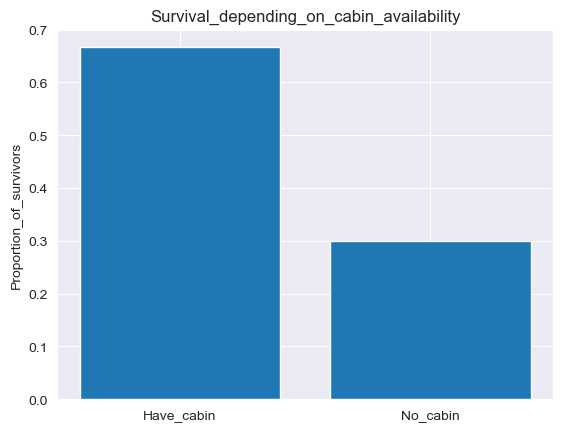

In [99]:
# Выделим пассажиров в группы
have_cabin = titan_df.loc[(pd.notna(titan_df['cabin']))]
have_cabin_survived = titan_df.loc[((pd.notna(titan_df['cabin'])) & (titan_df['survived'] == 1))]
no_cabin = titan_df.loc[(pd.isna(titan_df['cabin']))]
no_cabin_survived = titan_df.loc[((pd.isna(titan_df['cabin'])) & (titan_df['survived'] == 1))]

# Визуализируем долю выживших
fig, ax = plt.subplots()
ax.bar(('Have_cabin', 'No_cabin'), (len(have_cabin_survived)/len(have_cabin), len(no_cabin_survived)/len(no_cabin)))
ax.set_ylabel('Proportion_of_survivors')
ax.set_title('Survival_depending_on_cabin_availability')
plt.show()

# -- Have a relationship on the board analysis

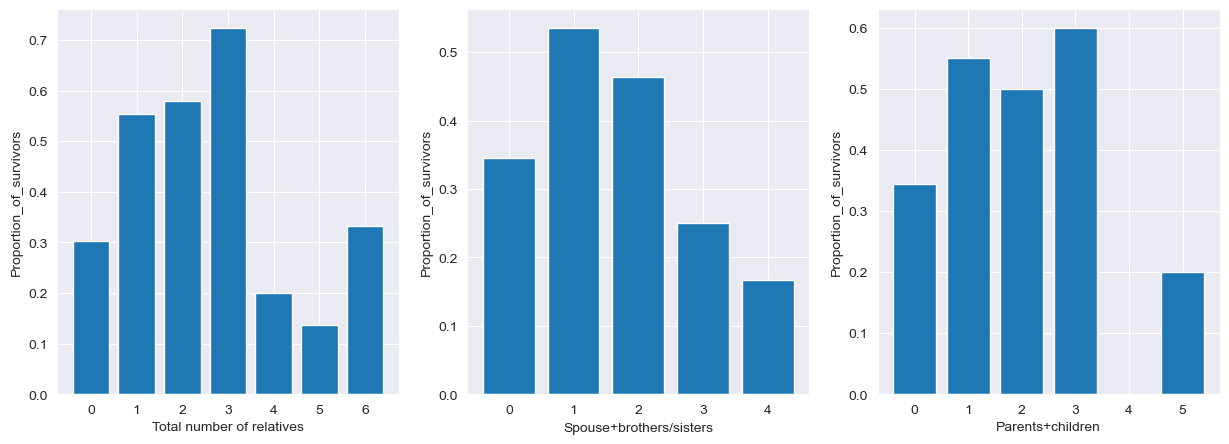

In [106]:
# add family feature
# titan_df.insert(13, 'Family', np.array(titan_df.sibsp, int) + np.array(titan_df.parch, int))


sibsp_total = dict(Counter(titan_df.sibsp))
parch_total = dict(Counter(titan_df.parch))
family_total = dict(Counter(titan_df.Family))
sibsp_survived = dict(Counter(titan_df.loc[(titan_df['survived'] == 1)].sibsp))
parch_survived = dict(Counter(titan_df.loc[(titan_df['survived'] == 1)].parch))
family_survived = dict(Counter(titan_df.loc[(titan_df['survived'] == 1)].Family))
relatives = (family_total, sibsp_total, parch_total)
relatives_survived = (family_survived, sibsp_survived, parch_survived)

fig, axs = plt.subplots(1, 3, figsize=(15,5))
xlabs = ('Total number of relatives', 'Spouse+brothers/sisters', 'Parents+children')

for i in range(3):
    probs = []
    for rel, amount in relatives_survived[i].items():
        probs.append(amount / relatives[i][rel])
    axs[i].bar(relatives_survived[i].keys(), probs)
    axs[i].set_ylabel('Proportion_of_survivors')
    axs[i].set_xlabel(xlabs[i])
plt.show()

In [113]:
titan_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,Title,cabin,embarked,Family,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Mr.,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Mrs.,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Miss.,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Mrs.,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Mr.,NaN,S,0,1


<Axes: >

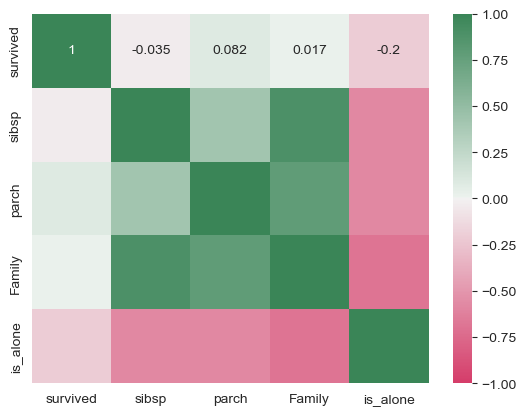

In [111]:
# Добавим признак is_alone
is_alone = []
for fam in titan_df.Family:
    if fam == 0:
        is_alone.append(1)
    else:
        is_alone.append(0)
# titan_df.insert(14, 'is_alone', is_alone)

# Correlation heatmap
sns.heatmap(titan_df[['survived', 'sibsp', 'parch', 'Family', 'is_alone']].corr(), annot=True, vmin=-1, vmax=1, cmap=sns.diverging_palette(0, 500, as_cmap=True))

# -- tickets and embarked place

<Axes: >

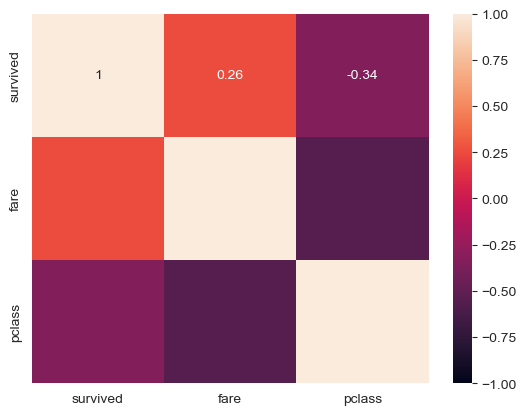

In [112]:
sns.heatmap(titan_df[['survived', 'fare', 'pclass']].corr(), annot=True, vmin=-1, vmax=1)

# -- ticket for each class

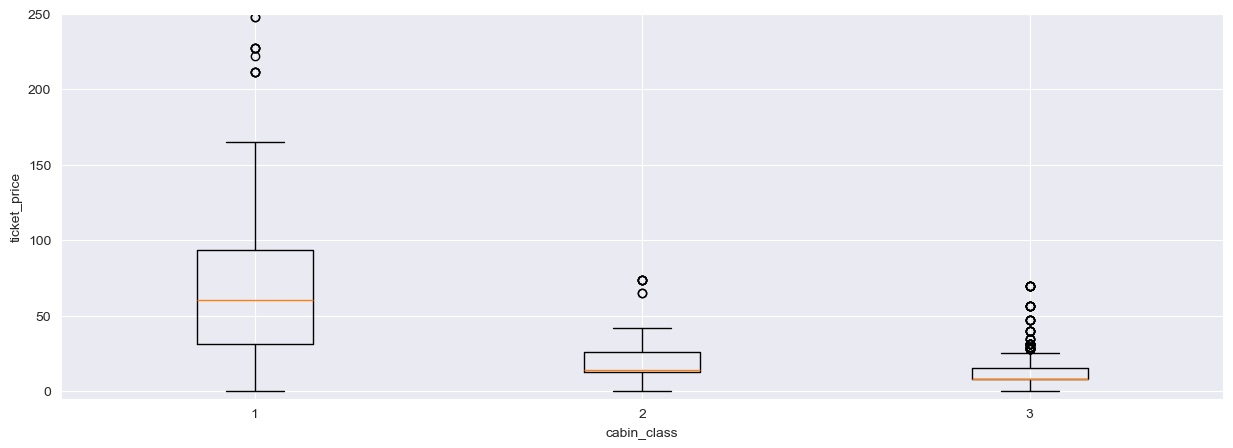

In [116]:
fare = dict.fromkeys((1,2,3), [])
for i, price in enumerate(titan_df.fare):
    fare[titan_df.pclass[i]] = fare[titan_df.pclass[i]] + [price]


fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(fare.values(), labels=(1,2,3), vert=True)
ax.set_ylabel('ticket_price')
ax.set_xlabel('cabin_class')
ax.set_ylim(-5, 250)
plt.show()

In [118]:
#Let's replace tickets with zero cost with the median cost for the corresponding class
for i, fare in enumerate(titan_df.fare):
    if np.isclose(fare, .0):
        titan_df.fare[i] = np.median(fares[titan_df.pclass[i]])

TypeError: 'float' object is not subscriptable

In [119]:
for i, emb in enumerate(titan_df.embarked):
    if pd.isna(emb): titan_df.embarked[i] = 'S'

C:\Users\Alex\AppData\Local\Temp\ipykernel_5372\1438617191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if pd.isna(emb): titan_df.embarked[i] = 'S'
C:\Users\Alex\AppData\Local\Temp\ipykernel_5372\1438617191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if pd.isna(emb): titan_df.embarked[i] = 'S'


# -- male/female on the board

In [ ]:
titanic_df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

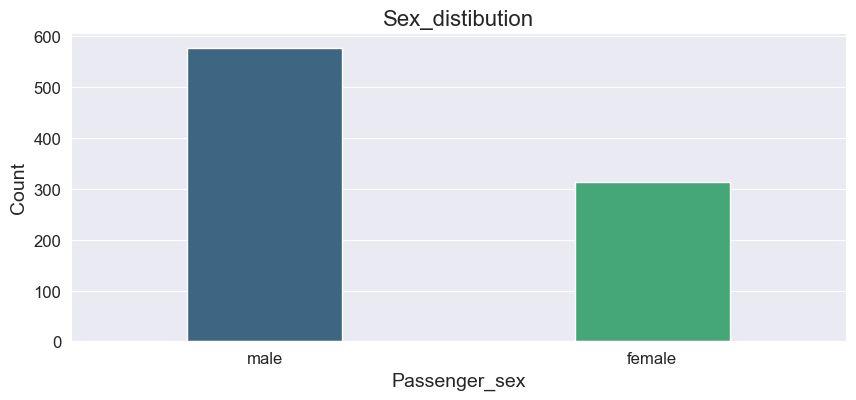

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.countplot(titanic_df,x='sex',palette = 'viridis',width=0.4)
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Passenger_sex', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()

# -- how many male/female of each class was on the ship

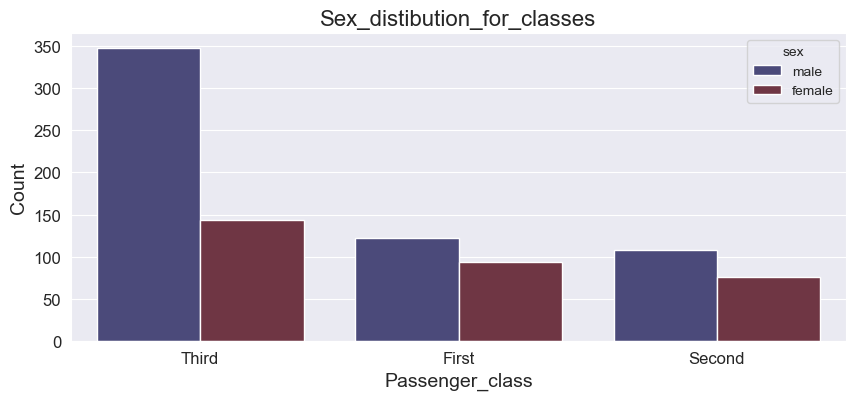

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.countplot(titanic_df,x='class',hue='sex',palette = 'icefire')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution_for_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Passenger_class', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()

# -- what percent of surv from male / female

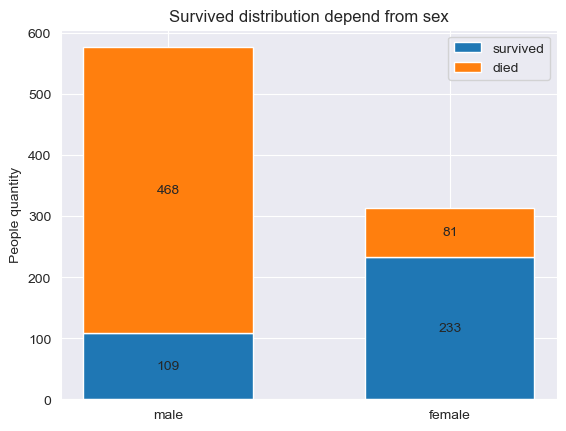

In [ ]:
# full quantity and quantity of male/ female
males_total = len(titanic_df.loc[(titanic_df['sex'] == 'male')])
females_total = len(titanic_df.loc[(titanic_df['sex'] == 'female')])
males_survived = len(titanic_df.loc[((titanic_df['sex'] == 'male') & (titanic_df['survived'] == 1))])
females_survived = len(titanic_df.loc[((titanic_df['sex'] == 'female') & (titanic_df['survived'] == 1))])
males_unsurvived = len(titanic_df.loc[((titanic_df['sex'] == 'male') & (titanic_df['survived'] == 0))])
females_unsurvived = len(titanic_df.loc[((titanic_df['sex'] == 'female') & (titanic_df['survived'] == 0))])

#vizualize
survivors_counts = {
    'survived': [males_survived, females_survived],
    'died': [males_unsurvived, females_unsurvived]
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for key, count in survivors_counts.items():
    p = ax.bar(('male', 'female'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Survived distribution depend from sex')
ax.set_ylabel('People quantity')
ax.legend()
plt.show()

In [ ]:
print(f'''survived male: {round(males_survived*100/males_total, 2)}%
survived female: {round(females_survived*100/females_total, 2)}%''')

survived male: 18.89%
survived female: 74.2%


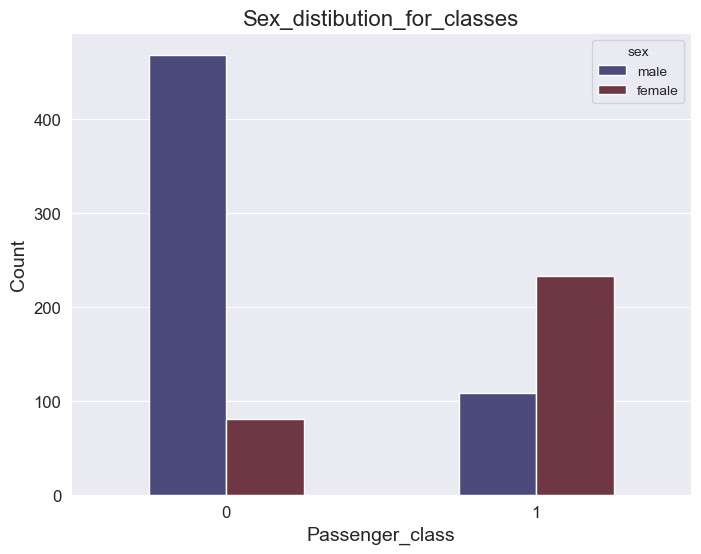

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(titanic_df,x='survived',hue = 'sex',palette = 'icefire', width=0.5)
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution_for_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Passenger_class', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()

# -- what precent of surv from each class

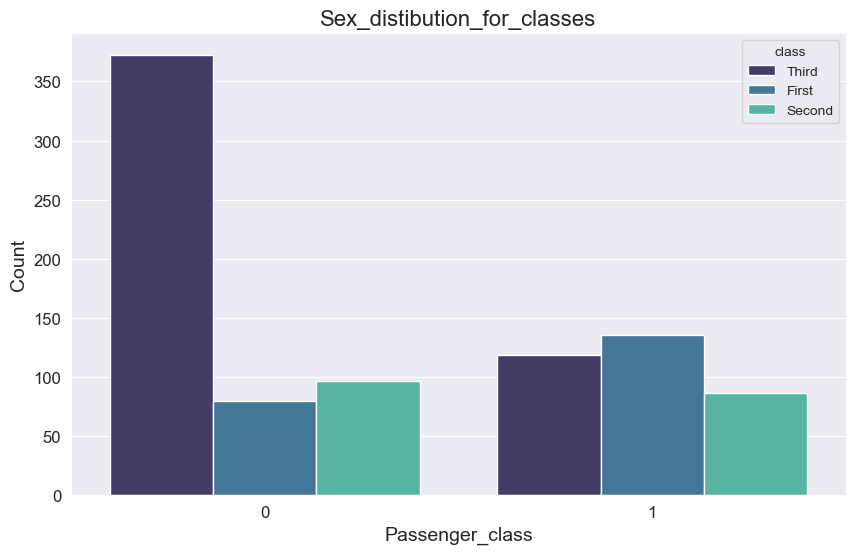

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(titanic_df,x='survived',hue='class',palette = 'mako')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution_for_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Passenger_class', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()

In [ ]:
titanic_df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


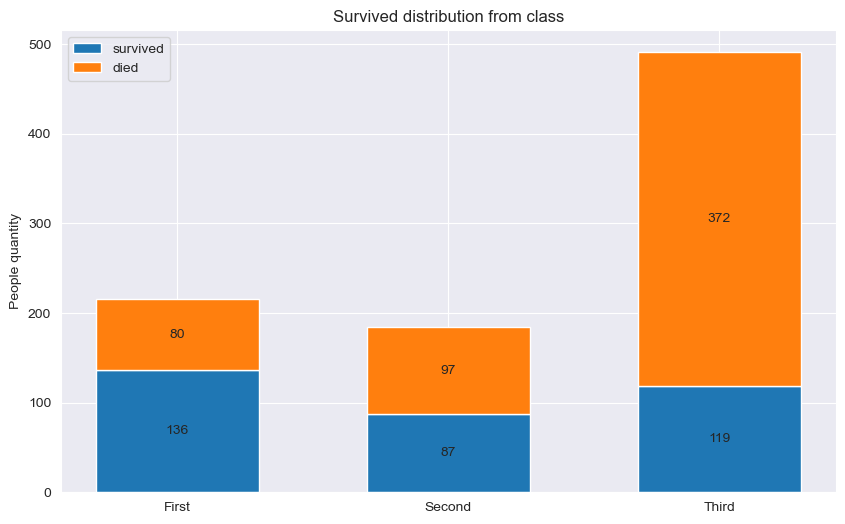

In [ ]:
# full quantity and quantity of class
first_total = len(titanic_df.loc[(titanic_df['class'] == 'First')])
second_total = len(titanic_df.loc[(titanic_df['class'] == 'Second')])
third_total = len(titanic_df.loc[(titanic_df['class'] == 'Third')])
first_survived = len(titanic_df.loc[((titanic_df['class'] == 'First') & (titanic_df['survived'] == 1))])
second_survived = len(titanic_df.loc[((titanic_df['class'] == 'Second') & (titanic_df['survived'] == 1))])
third_survived = len(titanic_df.loc[((titanic_df['class'] == 'Third') & (titanic_df['survived'] == 1))])

#vizualize
survivors_counts = {
    'survived': [first_survived, second_survived, third_survived],
    'died': [first_total-first_survived, second_total-second_survived, third_total-third_survived]
}

fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(3)

for key, count in survivors_counts.items():
    p = ax.bar(('First', 'Second', 'Third'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Survived distribution from class')
ax.set_ylabel('People quantity')
ax.legend()
plt.show()

In [ ]:
#percentage
print(f'''survived_1_class: {round(first_survived*100/first_total, 2)}%
survived_2_class: {round(second_survived*100/second_total, 2)}%
survived_3_class: {round(third_survived*100/third_total, 2)}%
''')

survived_1_class: 62.96%
survived_2_class: 47.28%
survived_3_class: 24.24%



# -- how many pass of each emb place was on the ship

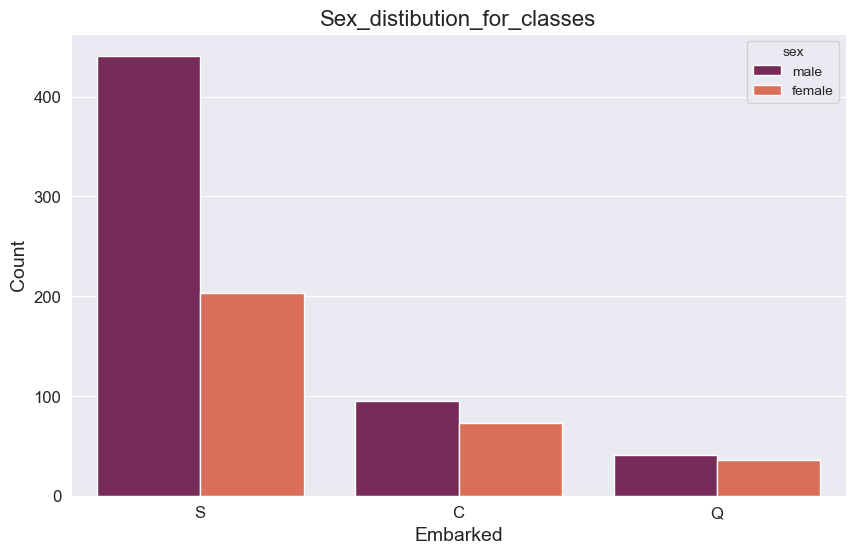

In [ ]:
# C : Cherbourg, Q : Queenstown, S : Southampton

fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.countplot(titanic_df,x='embarked',hue='sex',palette = 'rocket')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution_for_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Embarked', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()

In [ ]:
titanic_df.isna().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64